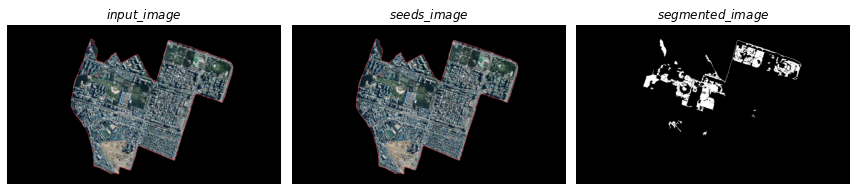

In [13]:

import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import cv2 as cv

#  시드 픽셀값과 현재 픽셀값의 차이를 구하는 함수
def getGrayDiff(gray, current_seed, tmp_seed):
    return abs(int(gray[current_seed[0], current_seed[1]]) - int(gray[tmp_seed[0], tmp_seed[1]]))

#  Region growing 알고리즘 
def regional_growth(gray, seeds):   #매개변수는 사진이랑, seed(마크)
	# 8개의 필드
    connects = [(-1, -1), (0, -1), (1, -1), (1, 0), \
                (1, 1), (0, 1), (-1, 1), (-1, 0)]          #seed에서 connects좌표로 이동
    seedMark = np.zeros((gray.shape)) #사진의 크기(575*830*3)만큼 0으로된 배열을 만듬
    height, width = gray.shape #사진의 가로 세로 크기 저장
    threshold = 5 #사진의 임계값을 6으로 설정
    seedque = deque()      #빈 deque생성
    label = 255  #
    seedque.extend(seeds)  #seedque에 seed를 추가

    while seedque : #seedque 배열만큼 반복 
    	# que는 first in first out이므로 왼쪽부터 삭제한다.
        current_seed = seedque.popleft()       #seedque의 첫번째 원소를 current_seed에 저장
        seedMark[current_seed[0], current_seed[1]] = label  #seedMark에서 current_seed[0], current_seed[1]의 인덱스 위치에 label을 넣는다.
        for i in range(8) :          #잘은 모르지만 seed를 기준으로 영역을 확정한다
            tmpX = current_seed[0] + connects[i][0]
            tmpY = current_seed[1] + connects[i][1]
            # Dealing with border situations 
            if tmpX < 0 or tmpY < 0 or tmpX >= height or tmpY >= width :       # 확장할 영역이 있으면 계속 확장
                continue

            grayDiff = getGrayDiff(gray, current_seed, (tmpX, tmpY))    # getGrayDiff함수를 통해 시드픽셀과 현재 픽셀의 차이를 구하고 
            if grayDiff < threshold and seedMark[tmpX, tmpY] != label :    # 그 차이가 threshold보다 낮고, seedMark[tmpX, tmpY]가 255가 아니면
                seedque.append((tmpX, tmpY))                               # seedque에 현재 픽셀을 추가한다
                seedMark[tmpX, tmpY] = label                         
    return seedMark

# 마우스 클릭하는 함수 
def Event_Mouse(event, x, y, flags, param) :
	# Left click mouse 
    if event == cv.EVENT_LBUTTONDOWN :        # 마우스 좌클릭시 
        seeds.append((y, x))                  # 좌표를 시드에 추가
        cv.circle(img, center = (x, y), radius = 2,        # 빨간색 점을 그리는 코드
                  color = (0, 0, 255), thickness = -1)

def Region_Grow(img):         # 이미지를 보여주는 함수
    cv.namedWindow('img',cv.WINDOW_NORMAL)
    cv.setMouseCallback('img', Event_Mouse)
    cv.imshow('img', img)

    while True :             
        cv.imshow('img', img)
        if cv.waitKey(1) & 0xFF == ord('q') :
            break
    cv.destroyAllWindows()


    CT = cv.imread('C:\\Users\\Master\\Desktop\\image\\pal3.png', 1)        # 이미지 불러오기
    seedMark = np.uint8(regional_growth(cv.cvtColor(CT, cv.COLOR_BGR2GRAY), seeds))         # 앞에서 정의한 regional_growth함수 사용
    seedMark = cv.resize(seedMark, dsize=(0,0), fx=0.5, fy=0.5, interpolation=cv.INTER_LINEAR)
    cv.imshow('seedMark', seedMark)
    cv.waitKey(0)
    cv.destroyAllWindows()   
    # 이미지를 그리는 코드
    plt.figure(figsize=(12, 4))
    plt.subplot(131), plt.imshow(cv.cvtColor(CT, cv.COLOR_BGR2RGB))
    plt.axis('off'), plt.title(f'$input\_image$')
    plt.subplot(132), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.axis('off'), plt.title(f'$seeds\_image$')
    plt.subplot(133), plt.imshow(seedMark, cmap='gray', vmin = 0, vmax = 255)
    plt.axis('off'), plt.title(f'$segmented\_image$')
    plt.tight_layout()
    plt.show()
    
if __name__ == '__main__':
    img = cv.imread('C:\\Users\\Master\\Desktop\\image\\pal3.png')
    seeds = []
    Region_Grow(img)